### Linear Regression for the embedded feature selection.

In [21]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [6]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[ : , : -1], diabetes_df['Outcome'], test_size = 0.2, random_state = 42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [10]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [11]:
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [12]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
lr_model = LinearRegression() 

lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
lr_model.coef_

array([ 0.03465559,  0.1803234 , -0.04219339,  0.00820563, -0.03230381,
        0.11631364,  0.03744793,  0.07425473])

In [20]:
# These values are actually tells the importance of the each feature. 

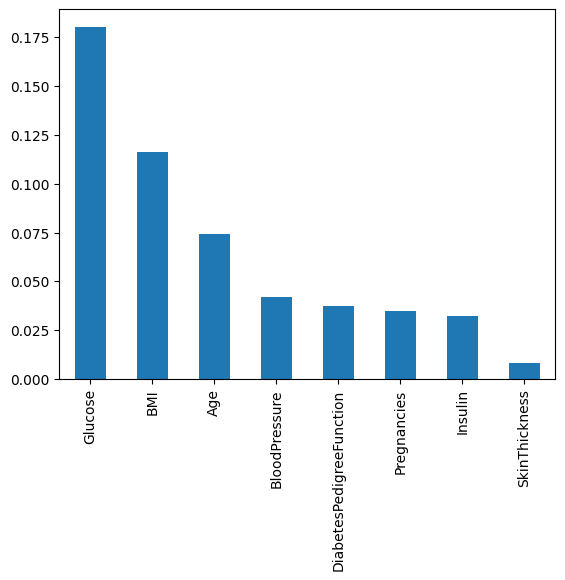

In [29]:
columns = diabetes_df.iloc[ : , : -1].columns
series = pd.Series(np.abs(lr_model.coef_), index = columns)

series.sort_values(ascending=False).plot(kind='bar')
plt.show()

### LASSO for the embedded feature selection.

In [30]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[ : , : -1], diabetes_df['Outcome'], test_size = 0.2, random_state = 42)

In [32]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [34]:
columns = X_train.columns

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_df = pd.DataFrame(X_train_scaled, columns = columns)
X_test_df = pd.DataFrame(X_test_scaled, columns = columns)

In [35]:
X_train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_df, y_train)

Lasso(alpha=0.1)

In [37]:
lasso.coef_

array([0.        , 0.1115119 , 0.        , 0.        , 0.        ,
       0.02291842, 0.        , 0.00329461])

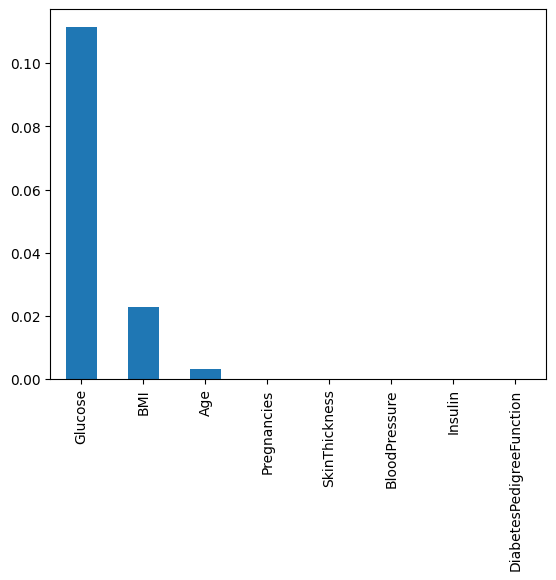

In [39]:
x = pd.Series(np.abs(lasso.coef_),index=columns)

x.sort_values(ascending=False).plot(kind='bar')
plt.show()

### Decision Tree for the embedded feature selection.

In [41]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

dt.fit(X_train,y_train)
# rf.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dt.feature_importances_

array([0.0552736 , 0.30787481, 0.14998281, 0.06239989, 0.06415067,
       0.16878339, 0.08687668, 0.10465816])

<Axes: >

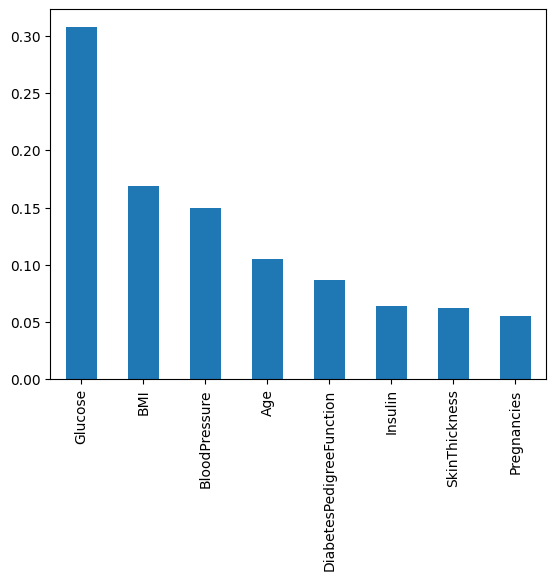

In [44]:
x = pd.Series(np.abs(dt.feature_importances_),index=columns)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

In [45]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [47]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean')

In [48]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [49]:
sfm.get_support(indices=True)

array([1, 5, 7])

In [50]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [51]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


### Recursive Feature Selection

In [52]:
# here we did RFS manually.

In [66]:
import pandas as pd 
import numpy as np 

from sklearn.ensemble import RandomForestClassifier

In [67]:
iris_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
X = iris_df.iloc[ : ,  : -1]
y = iris_df['species']

In [69]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [71]:
rf = RandomForestClassifier()

rf.fit(X, y)

RandomForestClassifier()

In [72]:
rf.feature_importances_

array([0.08539067, 0.02365241, 0.47169483, 0.41926208])

In [73]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [74]:
rf = RandomForestClassifier()

rf.fit(X, y)

RandomForestClassifier()

In [75]:
rf.feature_importances_

array([0.22390259, 0.38324911, 0.39284831])

In [77]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [78]:
rf = RandomForestClassifier()

rf.fit(X, y)

RandomForestClassifier()

In [79]:
rf.feature_importances_

array([0.47853909, 0.52146091])

In [80]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [81]:
# petal_length is most important feature from this iris dataset.

### Sklearn Recursive Feature Selection

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load iris dataset
iris_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris_df.head()


# Separate features and target variable
X = iris_df.iloc[ : , : -1]
y = iris_df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 1
petal_width: 2


### Mutual Information (Filter Based Feature Selection)

In [97]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.49730466845416155
Feature 1: Mutual Information = 0.2188380909576273
Feature 2: Mutual Information = 0.9776918354042279
Feature 3: Mutual Information = 0.9836285247921432


In [98]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
